# **Análisis de Segmentación de Clientes con K-means y Método del Codo**
**By: Diego Araujo**

🎯 **Objetivo:**  
Identificar grupos homogéneos de clientes mediante K-Means, optimizando el número de clústeres con el método del codo.  
Este análisis permite diseñar estrategias de marketing más efectivas y personalizadas.  

🔹 **Metodología:**  
1. Exploración y preprocesamiento de datos.  
2. Análisis de variables relevantes.  
3. Determinación del número óptimo de clústeres con el método del codo.  
4. Aplicación de K-Means.  
5. Visualización e interpretación de los resultados.  

🛠 **Librerías principales:**  
- `pandas` para manipulación de datos.  
- `scikit-learn` para implementación de K-Means.  
- `matplotlib` y `seaborn` para visualizaciones.  

📂 **Contenido del repositorio:**  
- Código completo del análisis.  
- Dataset utilizado.  
- Visualizaciones de resultados.  
- Documentación relevante.  

In [28]:
# Librerias que utilizaremos
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
# Para extraer nuestro archivo desde drive
#from google.colab import drive
#drive.mount('/content/drive')

In [62]:
# Importamos nuestra data
ruta_csv = '/content/drive/MyDrive/Codigos Python colab/centrocomercial.csv'
datos = pd.read_csv(ruta_csv ,delimiter=';', encoding='utf-8',index_col='ID')
datos.head()

,Genero,Edad,IngresoAnual,ScoreGasto
ID,,,,
1,Masculino,19,15,39
2,Masculino,21,15,81
3,Femenino,20,16,6
4,Femenino,23,16,77
5,Femenino,31,17,40


##Preprocesamiento de datos categóricos:
Convertiremos la variable categórica 'Genero' en variables dummy/indicadoras.
'drop_first=True' con esto omitimos la primera categoría alfabética para evitar la multicolinealidad, lo que significa que 'Femenino' será representado como 0 y 'Masculino' como 1. Lo cual nos facilitará el análisis.


In [63]:
datos['Genero'] = datos['Genero'].astype(str).str.strip()
# Transformamos a dummies
datos = pd.get_dummies(datos, columns=['Genero'], drop_first=True)
datos = datos.astype(int)
datos_preprocesados = datos
datos_preprocesados.head()

,Edad,IngresoAnual,ScoreGasto,Genero_Masculino
ID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


📌 **Estandarización de los datos numéricos con StandardScaler**

Antes de aplicar el algoritmo K-Means, es importante estandarizar los datos numéricos para asegurar que todas las variables tengan la misma escala. Esto evita que una variable con valores grandes (como el ingreso anual)  
domine sobre otras con valores más pequeños (como la edad o el score de gasto).

🔹 **¿Cómo lo hacemos?**  
Utilizamos `StandardScaler` de `scikit-learn`, que transforma los datos para que tengan **media 0 y desviación estándar 1**.  
Esto facilita la correcta agrupación en K-Means.

🛠 **Pasos:**  
1. **Inicializar el objeto StandardScaler**  
2. **Ajustar y transformar los datos** para aplicar la estandarización  
3. **Convertir los datos escalados** a un DataFrame para su uso en el modelo  


In [64]:
# Creamos la variable
estandarizar = StandardScaler()
# Aplicamos la estandarización
datos_std = estandarizar.fit_transform(datos_preprocesados)
print(datos_std)

[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992 -0.88640526]
 [-1.20926872 -1.66266033  1.00159627 -0.88640526]
 [-0.27630176 -1.62449091 -1.71591298 -0.88640526]
 [-1.13750203 -1.62449091  1.70038436 -0.88640526]
 [ 1.80493225 -1.58632148 -1.83237767  1.12815215]
 [-0.6351352  -1.58632148  0.84631002 -0.88640526]
 [ 2.02023231 -1.58632148 -1.4053405   1.12815215]
 [-0.27630176 -1.58632148  1.89449216 -0.88640526]
 [ 1.37433211 -1.54815205 -1.36651894 -0.88640526]
 [-1.06573534 -1.54815205  1.04041783 -0.88640526]
 [-0.13276838 -1.54815205 -1.44416206  1.12815215]
 [-1.20926872 -1.54815205  1.11806095  1.12815215]
 [-0.27630176 -1.50998262 -0.59008772 -0.88640526]
 [-1.3528021  -1.50998262  0.61338066  1.12815215]
 [ 0.94373197 -1.43364376 -0.82301709  1.12815215]
 [-0.27630176 -1.43364376  1.85

In [65]:
pd.DataFrame(datos_std).describe()

,0,1,2,3
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,3.108624e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,-8.864053e-01
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,-8.864053e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,-8.864053e-01
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.128152e+00
max,2.235532e+00,2.917671e+00,1.894492e+00,1.128152e+00


📌 **Cálculo del WCSS y Método del Codo con K-Means**

Para determinar el número óptimo de clústeres en K-Means, usamos el **método del codo**,  
que se basa en la métrica **WCSS (Within-Cluster Sum of Squares)**.  

🔹 **¿Qué es WCSS?**  
Es la suma de las distancias al cuadrado entre cada punto y el centroide de su clúster.  
A medida que aumentamos el número de clústeres, el WCSS disminuye, pero llega un punto donde la mejora ya no es significativa:  
ese punto es el "codo" y representa el número óptimo de clústeres.  

🛠 **Pasos del código:**  
1. **Inicialización de WCSS**: Se crea una lista vacía para almacenar los valores de WCSS para diferentes números de clústeres.  
2. **Bucle para probar distintos K (1 a 10)**:  
   - Se inicializa el modelo K-Means con `n_clusters=i`, donde `i` varía de 1 a 10.  
   - Se usa `init="k-means++"` para mejorar la inicialización de los centroides y acelerar la convergencia.  
   - Se fija `random_state=99` para garantizar reproducibilidad en los resultados.  
   - Se ajusta el modelo a los datos estandarizados (`kmeans.fit(datos_std)`).  
   - Se obtiene el WCSS con `kmeans.inertia_` y se almacena en la lista `wcss`.  

🔹 **¿Por qué usar el Método del Codo?**  
Al graficar los valores de WCSS contra el número de clústeres, buscamos el punto donde la disminución de WCSS se vuelve menos pronunciada.  
Ese punto óptimo nos dice cuántos clústeres usar para una segmentación eficiente.  


In [66]:
wcss = []
for i in range(1,11):
    kmedias = KMeans(n_clusters=i, init="k-means++", random_state=99)
    kmedias.fit(datos_std)
    wcss.append(kmedias.inertia_)
    print(f"WCSS para {i} clusters: {kmedias.inertia_}")

WCSS para 1 clusters: 800.0000000000003
WCSS para 2 clusters: 597.9472937932284
WCSS para 3 clusters: 494.8037500130456
WCSS para 4 clusters: 395.3169867246217
WCSS para 5 clusters: 352.6911891581294
WCSS para 6 clusters: 306.012247573168
WCSS para 7 clusters: 251.14240422042826
WCSS para 8 clusters: 200.36135925670212
WCSS para 9 clusters: 174.25047601247124
WCSS para 10 clusters: 152.02983429775693


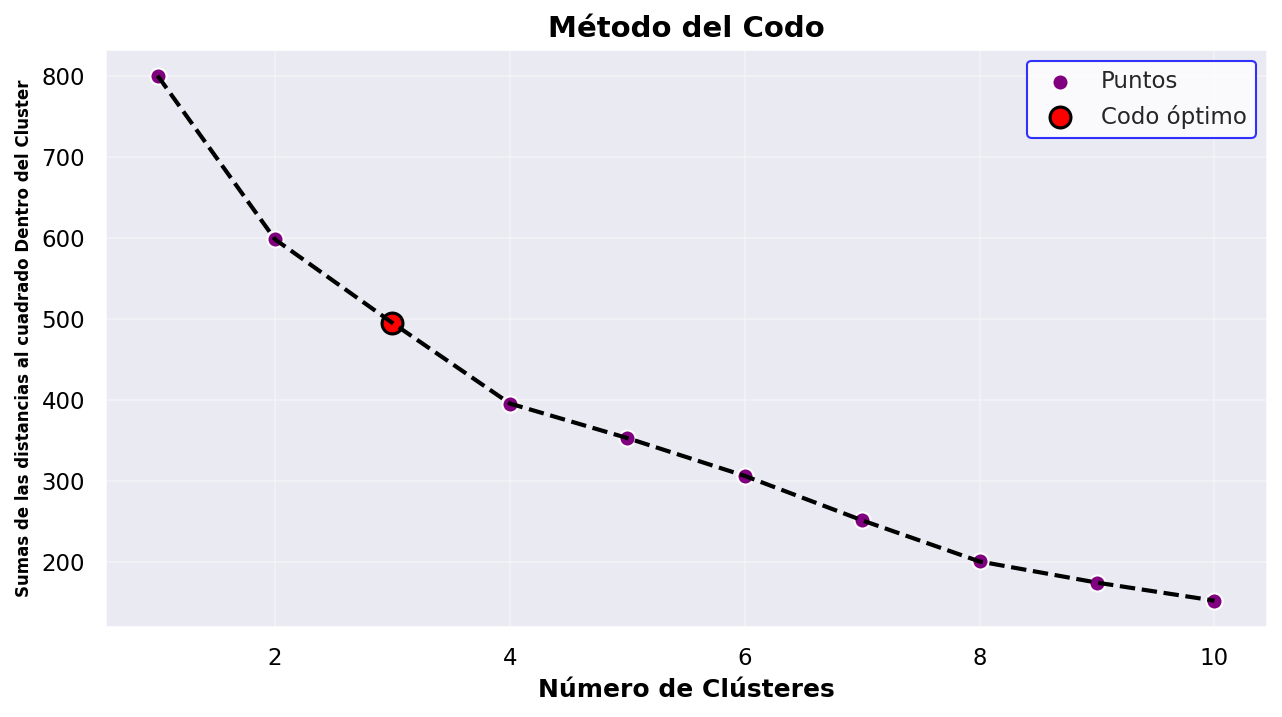

In [67]:
#Visualizacion de nuestra gráfica de codo
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(range(1, 11), wcss, linestyle="--", color="black", linewidth=2)  # Línea negra
plt.scatter(range(1, 11), wcss, color="purple", s=60, edgecolor="white", label="Puntos")  # Puntos morados
best_k = 3
plt.scatter(best_k, wcss[best_k - 1], color="red", s=100, edgecolor="black", linewidth=1.5, label="Codo óptimo")
plt.xlabel("Número de Clústeres", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Sumas de las distancias al cuadrado Dentro del Cluster", fontsize=8, fontweight="bold", color="black")
plt.title("Método del Codo", fontsize=14, fontweight="bold", color="black")
plt.xticks(fontsize=11, color="black")
plt.yticks(fontsize=11, color="black")
plt.legend(fontsize=11, facecolor="white", edgecolor="blue")
plt.show()

📊 **Interpretación de la Gráfica** 📉

La gráfica muestra la suma de las distancias al cuadrado dentro de los clústeres (WCSS) en función del número de clústeres seleccionados. El objetivo es identificar el punto óptimo donde agregar más clústeres deja de generar una reducción significativa en la varianza dentro de los grupos.

🔍 **Elementos clave:**
- Los puntos morados representan los valores de WCSS para cada número de clústeres.
- La línea punteada conecta estos valores para visualizar la tendencia decreciente.
- El punto rojo indica el "codo", que es el número óptimo de clústeres.

📌 **¿Cómo interpretar el resultado?**
Inicialmente, WCSS disminuye rápidamente, lo que significa que agregar clústeres reduce la variabilidad dentro de los grupos. Sin embargo, a partir de cierto punto, la reducción se vuelve menos significativa. Ese cambio de pendiente forma un "codo", y ese es el número óptimo de clústeres.

✅ En esta gráfica, el codo se encuentra aproximadamente en **k=3 o k=4**. Este es el número de clústeres que equilibra la simplicidad del modelo con una buena segmentación de los datos.

🏆 **Conclusión**
Con base en esta gráfica, 3 clústeres es la mejor opción para segmentar los clientes de manera eficiente, asegurando que los grupos sean representativos sin hacer el modelo demasiado complejo.

In [68]:
# Implementación del análisis de clusters con KMeans
k = 3
modelo_kmeans = KMeans(n_clusters=k, init="k-means++", random_state=99)
#Entrenamos nuestro modelo
modelo_kmeans.fit(datos_std)

KMeans(n_clusters=3, random_state=99)

In [70]:
# Añadimos los etiquetas de cluster a los datos preprocesados para su análisis
datos_preprocesados['Cluster'] = modelo_kmeans.labels_

In [71]:
# Crear una tabla de análisis agrupando por cluster y calculando la media de las variables
df_analisis = datos_preprocesados.groupby('Cluster').mean()

In [72]:
# Transponemos el DataFrame para que las categorías sean las columnas y los clusters las filas
datos_std_df = pd.DataFrame(datos_std, columns=datos_preprocesados.columns[:-1])
datos_std_df['Cluster'] = modelo_kmeans.labels_
datos_std_df = datos_std_df.groupby('Cluster').mean().T

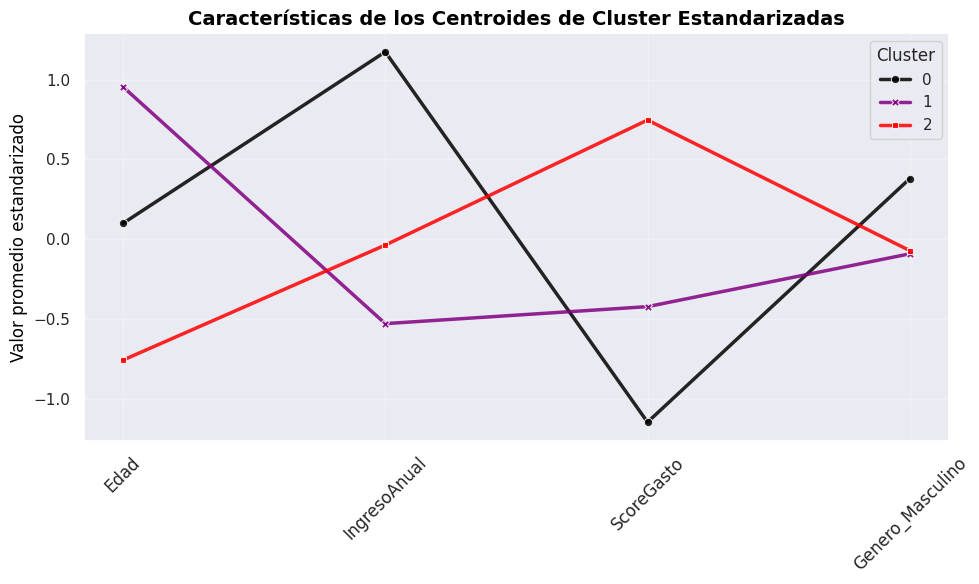

,Edad,IngresoAnual,ScoreGasto,Genero_Masculino
Cluster,,,,
0,40.228571,91.342857,20.628571,0.628571
1,52.169014,46.676056,39.295775,0.394366
2,28.276596,59.585106,69.446809,0.404255


In [77]:
# Generamos el gráfico de líneas con Seaborn
sns.set_theme(style="darkgrid")
custom_palette = ["black", "purple", "red"]
plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(
    data=datos_std_df,
    dashes=False,
    markers=True,
    linewidth=2.5,
    palette=custom_palette,
    alpha=0.85
)
plt.xticks(rotation=45, fontsize=12)
plt.title('Características de los Centroides de Cluster Estandarizadas', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Valor promedio estandarizado', fontsize=12, color='black')
plt.legend(title='Cluster', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()
df_analisis

📊 **Características de los Centroides de Clúster Estandarizadas** 🔍

Esta gráfica muestra cómo varían las características promedio de cada clúster en términos  de valores estandarizados. Cada línea representa un clúster y su relación con las variables:

📌 Variables en la gráfica:
- **Edad**: Promedio de edad dentro del clúster.
- **Ingreso Anual**: Promedio del ingreso anual de los individuos en cada clúster.
- **Score de Gasto**: Nivel de gasto relativo dentro del clúster.
- **Género Masculino**: Proporción de hombres en el clúster.

🔎 Análisis de los Clústeres:
- **Clúster 0 (Negro)**:
  - Representa individuos con ingresos altos (91.3) pero un bajo score de gasto (~20.6).
  - Son de edad intermedia (40.2) y tienen una mayor proporción de hombres (~0.63).
  
- **Clúster 1 (Morado)**:
  - Grupo de mayor edad (52.2) con ingresos más bajos (46.7) y score de gasto moderado (~39.3).
  - Tiene una menor proporción de hombres (~0.39).

- **Clúster 2 (Rojo)**:
  - Grupo más joven (28.3) con ingresos intermedios (59.6) y el mayor score de gasto (~69.4).
  - La proporción de hombres (~0.40) es similar a la del Clúster 1.

📈 **Conclusiones**:
- El **Clúster 0** agrupa personas con altos ingresos pero que gastan poco, lo que podría representar individuos con hábitos de ahorro o menos inclinados al consumo.
- El **Clúster 1** representa a personas de mayor edad, con menores ingresos y gasto moderado.
- El **Clúster 2** son los clientes jóvenes con alto consumo relativo, por lo que podrían ser un segmento clave para estrategias de marketing.



🔍 **Conclusión Final: Aplicación del Análisis de Clústeres con K-Means** 📊

Este análisis de segmentación utilizando **K-Means** nos ha permitido identificar distintos grupos de clientes en función de variables clave como **Edad, Ingreso Anual, Score de Gasto y Género**. A través del **Método del Codo**, seleccionamos el número óptimo de clústeres, asegurando una segmentación efectiva.

📌 **Principales Hallazgos**:
1️⃣ Se identificaron tres segmentos de clientes con características y patrones de consumo distintos.
2️⃣ La segmentación mostró que los clientes más jóvenes tienden a gastar más, mientras que los de mayor edad tienen ingresos más bajos y un gasto moderado.
3️⃣ El análisis de los centroides permitió interpretar la estructura de cada clúster y su comportamiento.

🚀 **Aplicaciones en Diferentes Áreas**:

✅ **Marketing y Ventas**: Permite diseñar estrategias personalizadas para cada segmento, optimizando campañas y promociones dirigidas.

✅ **Gestión de Riesgos**: Identifica perfiles de clientes con diferentes niveles de gasto, ayudando a evaluar riesgos financieros o de crédito.

✅ **Análisis Financiero**: Facilita la comprensión del comportamiento del consumidor en función de ingresos y patrones de gasto.

✅ **Recursos Humanos**: Puede aplicarse en estudios salariales y en la segmentación de empleados para beneficios o programas internos.

📈 **Valor del Análisis**:
El uso de técnicas de **Machine Learning**, como K-Means, proporciona una base sólida para la toma de decisiones basada en datos.
Este enfoque permite mejorar la eficiencia en diversas áreas, optimizar estrategias y maximizar oportunidades de negocio.